# 先看下文件夹有哪些文件

## 微信给我内容
Airbnb是一个在线平台，将想要出租房屋的人联系在一起
在那个地方寻找住处的人。

它目前涵盖的范围超过全球有81000个城市和191个国家。Airbnb的房东列出了很多不同种类的房子物业-单间、套房、公寓等。

对于Airbnb来说，有能力预测列表的受欢迎程度，为潜在的客人提供有效的推荐。

Airbnb还提供了一般的指导，为主机设置自己的价格为他们的清单。

然而，在Airbnb上为出租物业定价对房东来说是一项具有挑战性的任务决定了一个地方的顾客数量，特别是在大城市激烈的竞争，甚至是很小的价格差异都会产生很大的差异。

2017年，曼彻斯特使用Airbnb的游客比例从3.6%攀升至5.6%。

本课程为您提供了一个探索Airbnb如何被使用的机会与大曼彻斯特地区的住宅市场竞争。

### 已经向您提供了以下数据文件(原始数据来自内部Airbnb网站):

- listing_summary.csv - Airbnb列表的汇总数据曼彻斯特地区
- listing_details.csv -详细的列表数据
- review_summary.csv -客人提供的列表摘要审查数据
- review_details.csv -详细的查看数据
- calendar.csv—通过列表了解下一年的预订细节。
- 为地理过滤器的邻居列表。街区。geojson 
- geojson文件的邻近的伟大曼彻斯特地区

### 您可以使用部分或所有这些数据文件，以完成以下两项任务:
1. 中创建了一个' is_popular '变量在 listings_details.csv文件)
2. 预测上市价格

### 作业的目的是让你展示:
- 你理解数据的能力
- 你为建模和评估准备数据的能力
- 你应用不同建模技术的能力

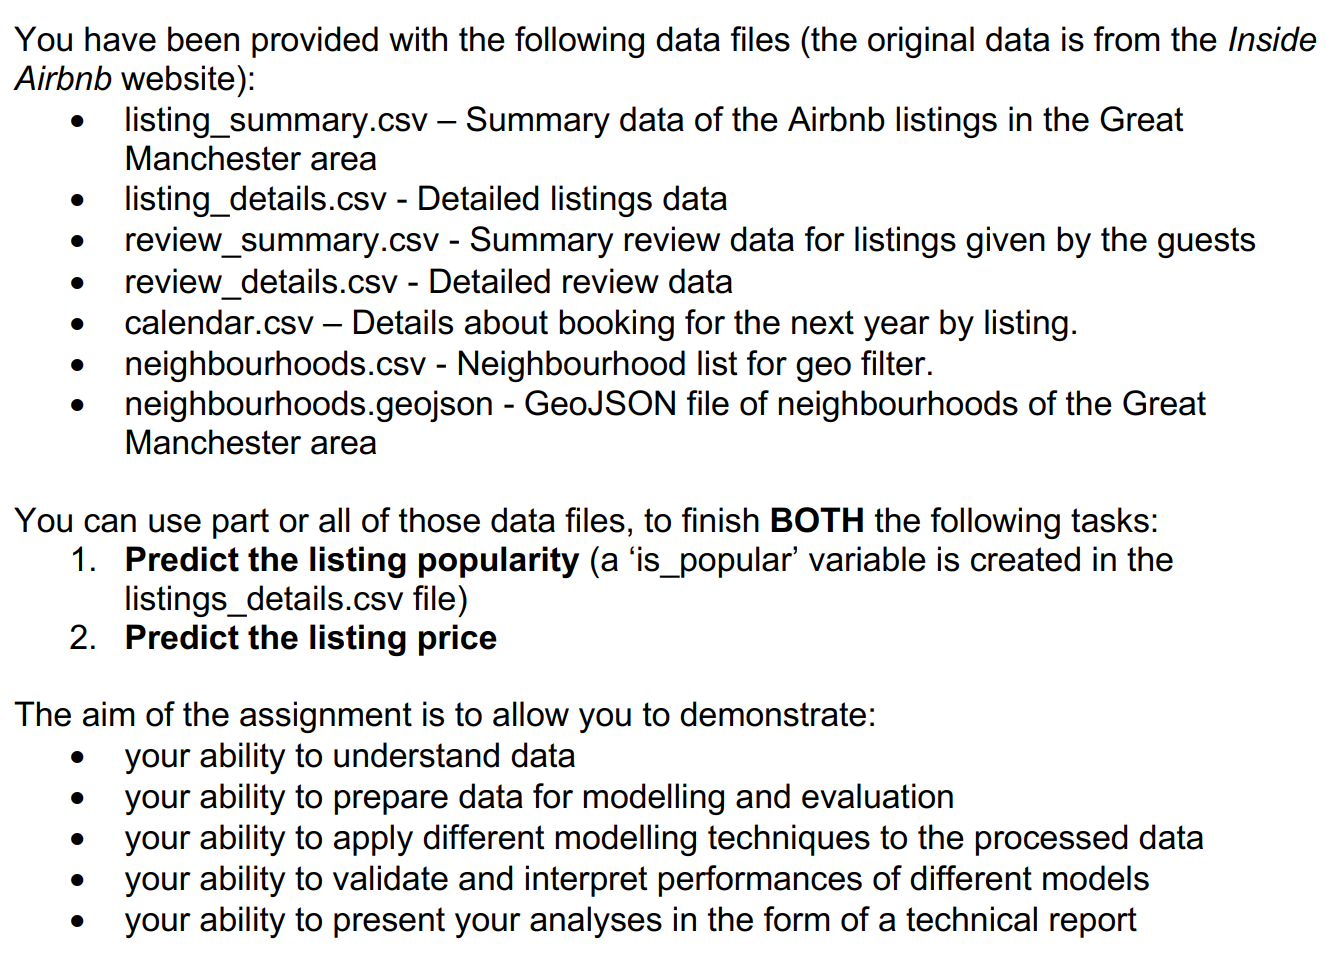

WHAT YOU SHOULD SUBMIT
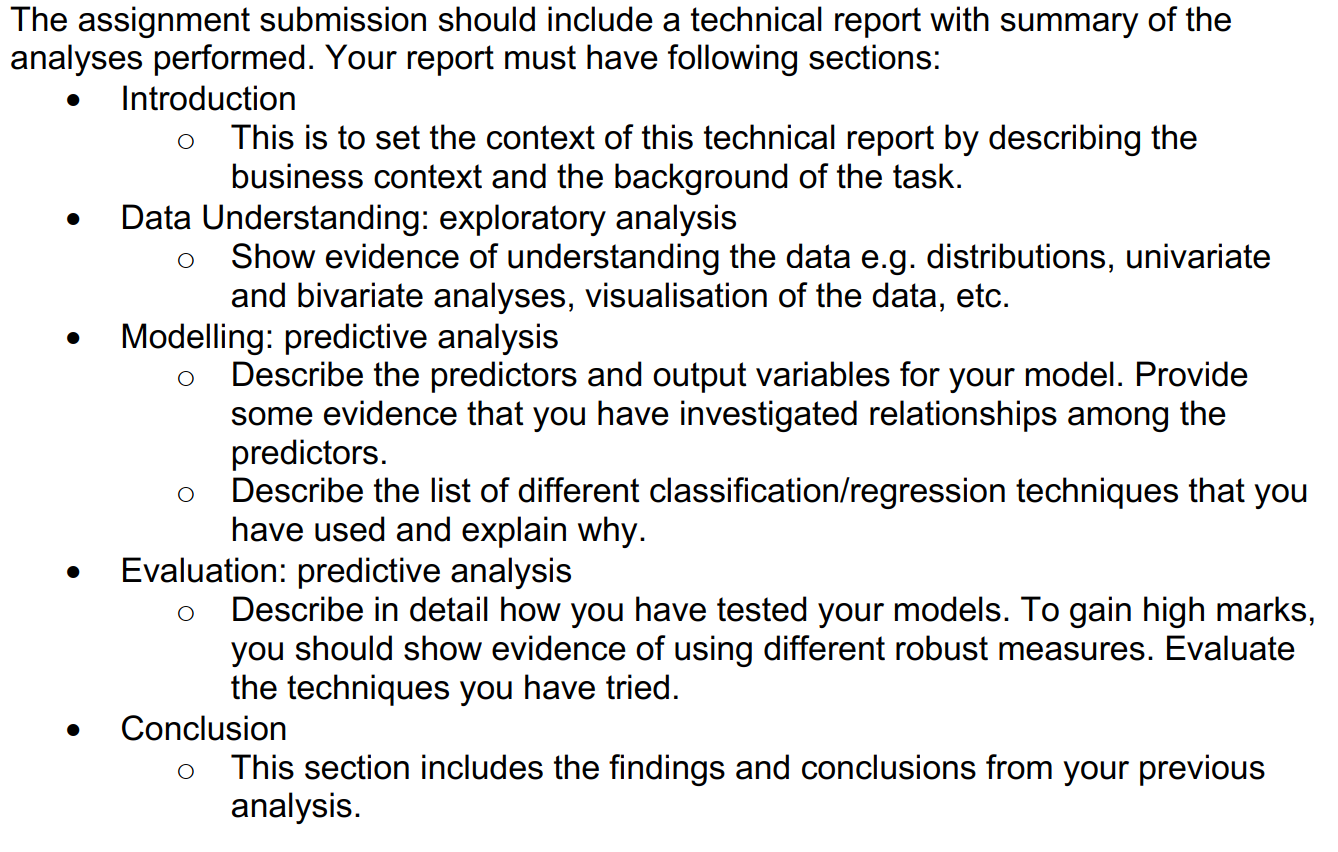

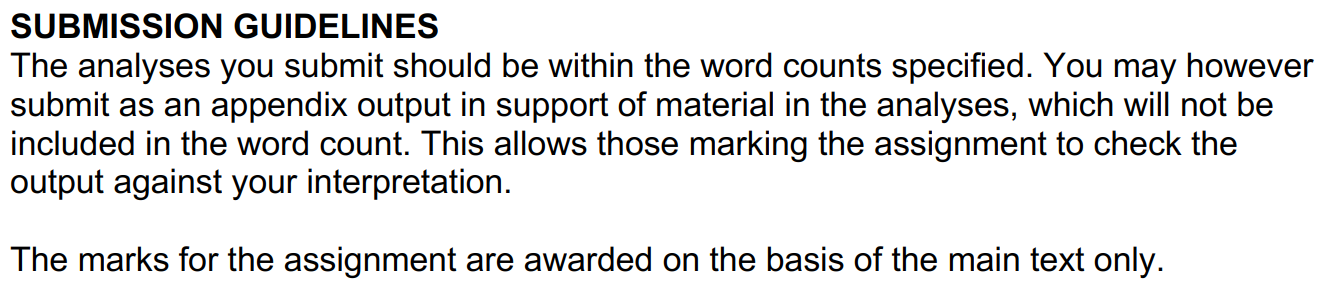

从官方找到数据集
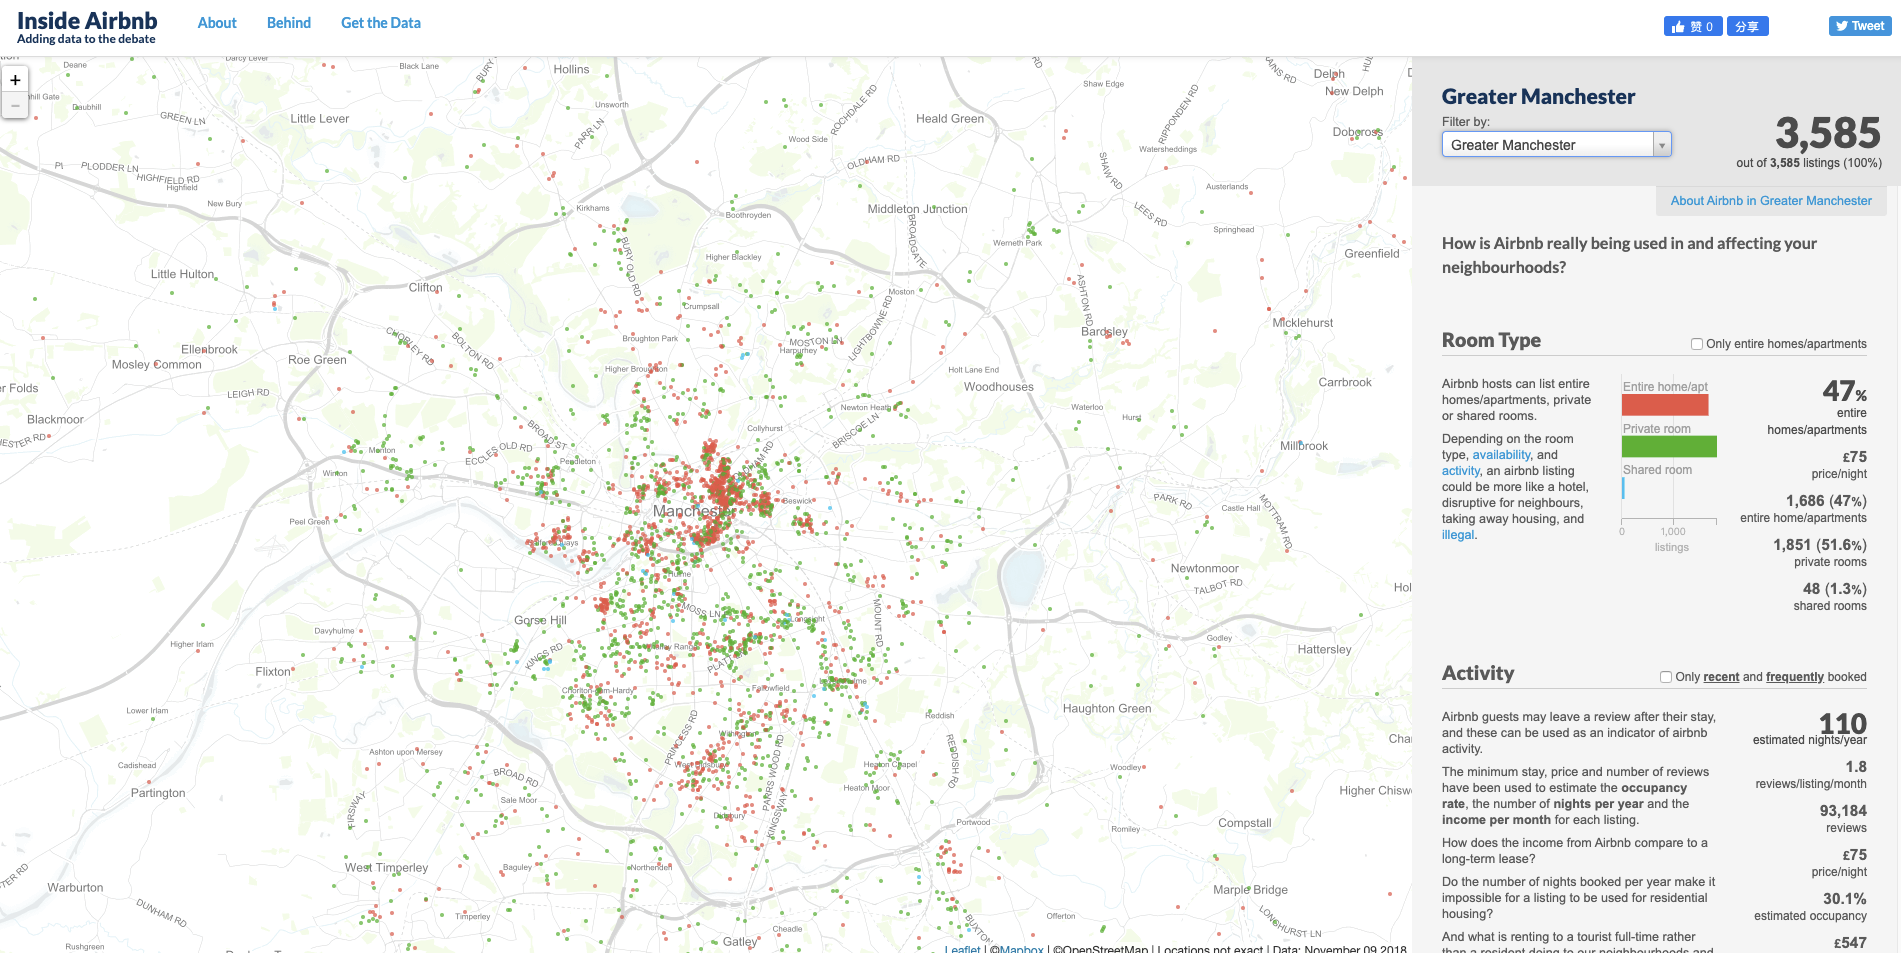

# 正文开始

首先看一下这个数据集有几个文件，通过一段代码可以查看到这个文件夹有几个csv文件，和一个geojson文件，当然这一步也可以直接在电脑中打开文件夹查看；

知道有这么多文件，但是我们并不知道都是什么，所以先分别的打开做一个初步了解


In [3]:
import os

path='AirbnbDatas'
def get_names(dir):
    fl=[]
    dirp=[]
    for home,dirs,files in os.walk(path):
        for file_name in files:
            fl.append(file_name)
        for one in dirs:
            dirp.append(one)
    return fl
if __name__ =="__main__":
    fl=get_names(dir)
    print(len(fl))

    for item in fl:
        print(item)

8
.Rhistory
reviews_details.csv
neighbourhoods.geojson
neighbourhoods.csv
calendar.csv
listings_details_2020Mar18.csv
reviews_summary.csv
listings_summary.csv


## 一个文件一个文件先看一下是啥

这里我选用pandas工具当做今天数据分析的主要工具，导入它

In [1]:
import pandas as pd

通过pandas 的head函数方法可以看到每个表的头部的几行； 
通过shape函数可以看到每个表的行数列数；
因此将每个文件打开查看，分别看其行列数，以及前五行。这样可以快速了解每个表的构成。

现在他们的概述如下:
- reviews_detail表主要是汇总表及评论,评论中有房子编号、用户编号、评论日期、评论内容等。136268行，6列；
- neighbourhoods表41行，2列，主要说了临街是哪儿，比如街区是Bolton，那临街是BoltonDistrict；
- calendar表主要是价格，包括标记价格和调整后价格，最少居住夜晚数、最多可住夜晚数，available位t是可以预定出租，f说名被租了，不能预定；这个表比较大一共1769520行数据；
- listings_details_2020Mar18表是细节吧，房子编号，详情页面，更新日期，房主，摘要概论，房子介绍，临街介绍，每月浏览人数。。。。等，4848行；
- reviews_summary表是个台账，作用不详；
- listings_summary是房子详情汇总表，同样4848行；

In [4]:
rd=pd.read_csv(path+'/reviews_details.csv')
print(rd.shape)
rd.head(3)

(136268, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,68951,993691,2012-03-12,1602133,Leopoldo,Comfy and cosy space with a welcome survival k...
1,68951,1305184,2012-05-19,2093255,Deepthi,We stayed with Paul for 2 nights on a business...
2,68951,1369794,2012-05-29,337778,Graham,What a fantastic place. We stayed for a week ...


In [5]:
nbh=pd.read_csv(path+'/neighbourhoods.csv')
print(nbh.shape)
nbh.head(3)

(41, 2)


,neighbourhood_group,neighbourhood
0,Bolton,Bolton District
1,Bury,Bury District
2,Manchester,Ancoats and Clayton


In [6]:
cld=pd.read_csv(path+'/calendar.csv')
print(cld.shape)
cld[195:220]
cld.sample(5)

(1769520, 7)


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
467258,18747183,2020-09-27,f,$130.00,$130.00,1,1125
319488,16252137,2020-03-08,t,$27.00,$27.00,1,1125
891887,29033499,2020-06-26,f,$40.00,$40.00,1,1125
1691917,39729077,2020-10-31,t,$111.00,$111.00,2,1125
3676,2235260,2020-06-21,t,$28.00,$28.00,2,1125


In [7]:
ld=pd.read_csv(path+'/listings_details_2020Mar18.csv')
print(ld.shape)
ld.head(3)


(4848, 105)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,is_popular
0,68951,https://www.airbnb.com/rooms/68951,2.020000e+13,16/11/2019,Whole House for rent,Complete House with all mod cons and just next...,Separate House attached to our own home - cons...,Complete House with all mod cons and just next...,none,NaN,...,f,strict_14_with_grace_period,f,t,1,1,0,0,0.88,t
1,85109,https://www.airbnb.com/rooms/85109,2.020000e+13,16/11/2019,"Best Location! !, WIFI, En-suite, Balcony!",If you haven't tried Airbnb before - go for i...,PLEASE NOTE - IF YOU INTEND TO CHECK IN AFTER ...,If you haven't tried Airbnb before - go for i...,none,We are situated right in the middle of Manches...,...,f,strict_14_with_grace_period,f,f,4,1,3,0,4.03,t
2,157612,https://www.airbnb.com/rooms/157612,2.020000e+13,16/11/2019,New attic space/single & Dble room,"The loft space is a small but cosy, private an...",A new private loft conversion is available in ...,"The loft space is a small but cosy, private an...",none,There is a public park within easy walking dis...,...,f,moderate,t,t,1,1,0,0,0.98,t


In [10]:
rsum=pd.read_csv(path+'/reviews_summary.csv')
rsum.head(5)


,listing_id,date
0,68951,2012-03-12
1,68951,2012-05-19
2,68951,2012-05-29
3,68951,2012-06-12
4,68951,2012-07-02


In [9]:
lsum=pd.read_csv(path+'/listings_summary.csv')
print(lsum.shape)
lsum.head(3)


(4848, 15)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,68951,Whole House for rent,341682,Paul & Della,Bolton,Bolton District,53.56214,-2.53305,Entire home/apt,65,2,03/10/2019,0.88,1,163
1,85109,"Best Location! !, WIFI, En-suite, Balcony!",465854,Karyo,Manchester,City Centre,53.48074,-2.23186,Private room,60,2,14/11/2019,4.03,4,305
2,157612,New attic space/single & Dble room,757016,Margaret,Salford,Salford District,53.50114,-2.26429,Entire home/apt,34,2,29/09/2019,0.98,1,340


# 说说思路
## 01
现在通过前期了解，几个表格已经都看过了，在`listing_detail` 这个表有创建好的ispopular标注--t,f ，另外在`listings summary` 这个表有提到价格，而恰好这两个表他们都是4848行，因此后续可以考虑将两个表按房间编号id进行合并。

在后续数据清洗后，可以考虑用机器学习模型对清洗后房间数据进行学习和预测，学习内容包括定价、是否受欢迎两项。

# 数据清洗

目前考虑刚刚考虑的模型构建方法， 需要合并listings_summary和listings_details_2020Mar18表格，因此先分别清洗数据，将对模型构建无用的列至今进行去除。

打开`listings_summary.csv`表格，观察哪些对于模型构建无用，直接将其清除；

In [13]:
lsum=pd.read_csv(path+'/listings_summary.csv')
print(lsum.shape)
lsum.head(1)

(4848, 15)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,68951,Whole House for rent,341682,Paul & Della,Bolton,Bolton District,53.56214,-2.53305,Entire home/apt,65,2,03/10/2019,0.88,1,163


## 02 清洗lsumary表
LS表一共有15列，其中name\host_id\host_name\neighbourhood_group\neighbourhood\last_review\reviews_per_month\calculated_host_listings_count\availability_365 是房间名字、房主名字、街区、可居住天数，直接删除。
- lsum中 hostid是房主编号，hostname是房主姓名，这2列应该没啥用，直接删了； 
- lastreview是最后一次被观察？帖子挂在那，每天都可能有更新，但是定价是不变的，所以肯定没啥相关性，删了；
- 每月浏览量受位置、价格影响，所以自身不是变量影响因素，删掉；
- 可居住天数，这个一般是注册时随手填的，也不直接影响价格，予以删除；

In [14]:
lsum=lsum.drop(['name','host_id','host_name','neighbourhood_group','neighbourhood','last_review','reviews_per_month'],axis=1)


calculated_host_listings_count\availability_365 这两个与价格看看相关性，没关系直接drop掉

- 计算出的相关性很低，我个人翻译应该是这个房子被几个人注册的意思，对价格没影响，删
- price 与 availability_365 相关性也很低，0.05，删

In [16]:
# 价格与登记人数的皮尔逊
data = lsum[['price','calculated_host_listings_count']]
#计算皮尔逊系数
print(data.corr())
#计算斯皮尔曼
print(data.corr('spearman'))

# 价格与可居住天数?
data = lsum[['price','availability_365']]
#计算皮尔逊系数
print(data.corr())
#计算斯皮尔曼
print(data.corr('spearman'))

                                   price  calculated_host_listings_count
price                           1.000000                        0.082956
calculated_host_listings_count  0.082956                        1.000000
                                   price  calculated_host_listings_count
price                           1.000000                        0.177889
calculated_host_listings_count  0.177889                        1.000000
                     price  availability_365
price             1.000000          0.055589
availability_365  0.055589          1.000000
                     price  availability_365
price             1.000000          0.125452
availability_365  0.125452          1.000000


进行删除后查看info，可以看到表格没有空值， 数据非常清爽

In [17]:
lsum=lsum.drop(['calculated_host_listings_count','availability_365'],axis=1)

In [19]:
lsum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4848 entries, 0 to 4847
Data columns (total 6 columns):
id                4848 non-null int64
latitude          4848 non-null float64
longitude         4848 non-null float64
room_type         4848 non-null object
price             4848 non-null int64
minimum_nights    4848 non-null int64
dtypes: float64(2), int64(3), object(1)
memory usage: 227.4+ KB


In [20]:
lsum.head(3)

,id,latitude,longitude,room_type,price,minimum_nights
0,68951,53.56214,-2.53305,Entire home/apt,65,2
1,85109,53.48074,-2.23186,Private room,60,2
2,157612,53.50114,-2.26429,Entire home/apt,34,2


## 清洗l detial表

### 删绝对无用数据
看这个表格：一共有105列，非常非常多列
我们需要看看列名字，然后直接删掉无用的列

In [58]:
ld=pd.read_csv(path+'/listings_details_2020Mar18.csv')
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)
print(ld.shape)
ld.head(1)

(4848, 105)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,is_popular
0,68951,https://www.airbnb.com/rooms/68951,2.020000e+13,16/11/2019,Whole House for rent,Complete House with all mod cons and just next door to us if you need any help/advice. Welcome p...,Separate House attached to our own home - consists of two bedrooms - one double king size one tw...,Complete House with all mod cons and just next door to us if you need any help/advice. Welcome p...,none,NaN,NaN,"Close to local rail, bus and motorway links",NaN,"We live next door so are on hand if you need anything, otherwise you have total independence",Recommended occupancy is max 4 people No Smoking throughout Sorry No Pets,NaN,NaN,https://a0.muscache.com/im/pictures/4144487/c44b3831_original.jpg?aki_policy=large,NaN,341682,https://www.airbnb.com/users/show/341682,Paul & Della,10/01/2011,"Bolton, England, United Kingdom",We really enjoy hosting people and we can't wait to welcome you to our home. If you have any qu...,within a day,100%,NaN,t,https://a0.muscache.com/im/users/341682/profile_pic/1387541572/original.jpg?aki_policy=profile_s...,https://a0.muscache.com/im/users/341682/profile_pic/1387541572/original.jpg?aki_policy=profile_x...,NaN,1,1,"['email', 'phone', 'facebook', 'reviews', 'jumio', 'government_id', 'work_email']",t,t,"Westhoughton, England, United Kingdom",NaN,Bolton District,Bolton,Westhoughton,England,BL5 3,Manchester,"Westhoughton, United Kingdom",GB,United Kingdom,53.56214,-2.53305,t,House,Entire home/apt,4,1.0,2,6.0,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",""Indoor fireplace"",Heating,Washer,Dryer,""Smoke detector"",...",NaN,$65.00,$350.00,"$1,051.00",$150.00,$25.00,4,$10.00,2,180,2,2,180,180,2.0,180.0,2 months ago,t,0,0,0,163,16/11/2019,12/03/2012,03/10/2019,97.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,t,1,1,0,0,0.88,t


In [59]:
# 打印列名看看
colist=[column for column in ld]
colist


['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


上边是打印出来的列名，比如url网址、host_name这类，直接予以删除。具体删除内容如下，这些是肯定无关价格和受欢迎模型的

你翻译的时候，这些列你用你的语言描述一下也就是这些数据对于建模没有直接帮助，所以删掉

In [60]:
ld=ld.drop([ 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_acceptance_rate',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'is_location_exact',
 'room_type',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'minimum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'requires_license',
 'license',
 'jurisdiction_names',
 'instant_bookable',
 'is_business_travel_ready',
 'cancellation_policy',
 'calculated_host_listings_count',
 'reviews_per_month',],axis=1)
print(ld.shape)
ld.head(1)

(4848, 35)


,id,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,is_popular
0,68951,100%,t,1,1,t,t,53.56214,-2.53305,House,4,1.0,2,6.0,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",""Indoor fireplace"",Heating,Washer,Dryer,""Smoke detector"",...",$65.00,$150.00,$25.00,4,$10.00,180,97.0,10.0,9.0,10.0,10.0,9.0,9.0,f,t,1,0,0,t


经过删除后还剩35列，感觉还是有些多，剩下的看一看，如果没用还是删掉

### 看看都有什么值，没用的直接删了

In [30]:
ld['host_response_rate'].unique()  # 评分，保留

array(['100%', nan, '0%', '95%', '94%', '70%', '90%', '50%', '80%', '60%',
       '91%', '83%', '63%', '85%', '88%', '99%', '89%', '25%', '97%',
       '28%', '82%', '67%', '86%', '92%', '75%', '96%', '87%', '98%',
       '33%', '93%', '43%', '78%', '81%', '17%', '76%', '71%', '84%',
       '79%', '38%', '40%', '73%', '30%', '14%', '56%', '74%', '64%',
       '69%', '77%', '46%'], dtype=object)

In [31]:
ld['host_is_superhost'].unique()  # 保留

array(['t', 'f'], dtype=object)

In [33]:
ld['host_listings_count'].unique() # 删除

array([   1,    4,    3,    0,    5,    8,   16,    2,   51,    7,    6,
         10,    9,   20,  199,   12,   19,   18,   23,   30,   15,   11,
         33,   13,   14,   26,   42,   35,   32,   25,   21,   22,  149,
        134, 1117, 1043, 1119,   31,  851,   40,   24,   29,   57,   38,
         39,   41])

In [35]:
ld['property_type'].unique()  # 保留

array(['House', 'Apartment', 'Loft', 'Chalet', 'Townhouse', 'Cottage',
       'Serviced apartment', 'Guest suite', 'Camper/RV',
       'Bed and breakfast', 'Boat', 'Condominium', 'Aparthotel',
       'Guesthouse', 'Bungalow', 'Villa', 'Tent', 'Barn', 'Hotel',
       'Other', 'Farm stay', 'Cabin', 'Tiny house', 'Boutique hotel',
       'Hostel', 'Hut', 'Houseboat', 'Yurt', 'Campsite', 'Cave'],
      dtype=object)

In [36]:
ld['bed_type'].unique()   # 保留

array(['Real Bed', 'Pull-out Sofa', 'Futon', 'Couch', 'Airbed'],
      dtype=object)

In [37]:
ld['security_deposit'].unique()  # 保留

array(['$150.00', '$0.00', '$100.00', nan, '$120.00', '$400.00',
       '$250.00', '$200.00', '$500.00', '$299.00', '$300.00', '$80.00',
       '$78.00', '$82.00', '$70.00', '$130.00', '$85.00', '$90.00',
       '$350.00', '$95.00', '$700.00', '$83.00', '$3,867.00', '$76.00',
       '$62.00', '$99.00', '$390.00', '$77.00', '$399.00', '$75.00',
       '$199.00', '$66.00', '$81.00', '$450.00', '$1,000.00', '$74.00',
       '$275.00', '$175.00', '$79.00', '$1,300.00', '$125.00', '$71.00',
       '$750.00', '$900.00', '$600.00', '$262.00', '$2,000.00',
       '$1,500.00', '$3,820.00', '$365.00', '$3,000.00', '$209.00',
       '$202.00', '$88.00', '$157.00', '$87.00', '$315.00', '$96.00',
       '$105.00', '$89.00', '$86.00', '$185.00', '$235.00'], dtype=object)

In [38]:
ld['is_popular'].unique()   # 保留

array(['t', 'f'], dtype=object)

In [39]:
ld['require_guest_profile_picture'].unique()  #保留

array(['f', 't'], dtype=object)

In [41]:
ld['require_guest_phone_verification'].unique()  #保留

array(['t', 'f'], dtype=object)

维度，经度，在另一个表已经有了，删除

In [45]:
ld['calculated_host_listings_count_entire_homes'].unique()  #有多少个房子跟这个房子价格应该没关系，删

array([ 1,  0,  4,  3, 11,  2,  6,  7,  5, 19, 18,  8, 10, 17, 15, 16, 12,
       31,  9, 22, 39, 14, 28])

In [46]:
ld['calculated_host_listings_count_private_rooms'].unique()  # 留

array([ 0,  3,  1,  4,  2,  5, 38, 10,  6,  8, 22, 15, 11,  7,  9, 16, 14,
       12])

In [47]:
ld['calculated_host_listings_count_shared_rooms'].unique()# 留

array([0, 1, 4, 2, 6])

### 开删
删掉的大部分是对于建模没有意义的数据，比如host listing count  同时，经度纬度这两个表格在另一个要合并的表格中已经有了

In [54]:
ldel=ld.drop(['host_listings_count','calculated_host_listings_count_entire_homes','latitude','longitude'],axis=1)
ldel.head(1)


,id,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,is_popular
0,68951,100%,t,1,t,t,House,4,1.0,2,6.0,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",""Indoor fireplace"",Heating,Washer,Dryer,""Smoke detector"",...",$65.00,$150.00,$25.00,4,$10.00,180,97.0,10.0,9.0,10.0,10.0,9.0,9.0,f,t,0,0,t


## 下边准备作图，所以引入必要的包
numpy 方便后续对数据处理
matplotlib是python的画图工具
seaborn也是方便matplotlib画图的工具
warnings是为了不看报错

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set(style='ticks')
plt.rcParams['font.family']='Arial Unicode MS'
plt.rcParams['axes.unicode_minus']=False

warnings.filterwarnings('ignore')

### 做个热力图看相关性

(17.5, -0.5)

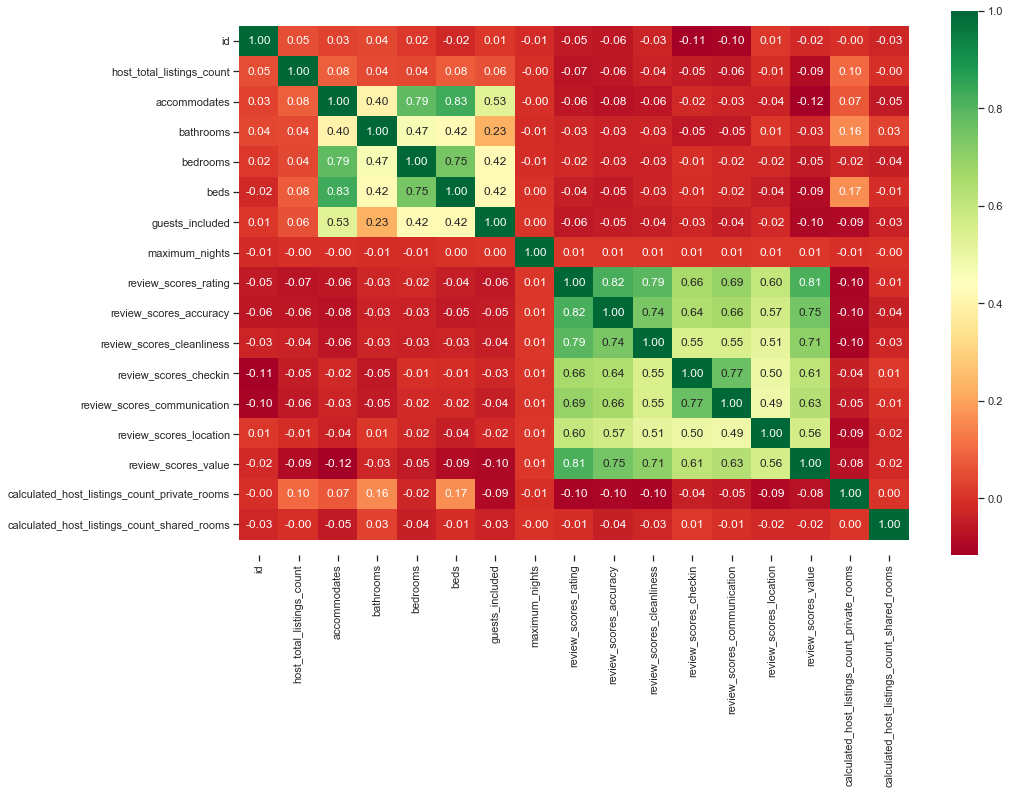

In [56]:
plt.figure(figsize=(15,10))
ax= sns.heatmap(ldel.corr(),cmap=plt.cm.RdYlGn , annot=True ,fmt='.2f')
a,b =ax.get_ylim()
ax.set_ylim(a+0.5,b-0.5)

通过热力图的观察可以看到，有5个数据与其他的没啥关相关性
- id
- host——total_listings_count
- maximum_nights
- calculated_host...private_rooms;
- share rooms.
因此删除后四个（id保留着，还等着合并表格）

In [65]:
ldel=ld.drop(['host_total_listings_count','price','maximum_nights','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','latitude','longitude'],axis=1)
ldel.head(1)

,id,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,is_popular
0,68951,100%,t,1,t,t,House,4,1.0,2,6.0,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",""Indoor fireplace"",Heating,Washer,Dryer,""Smoke detector"",...",$150.00,$25.00,4,$10.00,97.0,10.0,9.0,10.0,10.0,9.0,9.0,f,t,1,t


## 两个表格合并,再处理
现在表格还有很多是 t\f的布尔判断， 也有很多带着百分符号，还有一些带着$符号，因此，需要合并表格后再逐列处理

### 合并
合并表名hb

In [66]:
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

In [67]:
hb=pd.merge(lsum,ldel,on=['id'])
hb=hb.sort_values(by=['id'],ascending=False)
hb.sample(5)

,id,latitude,longitude,room_type,price,minimum_nights,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,is_popular
762,14868792,53.45071,-2.30620,Private room,226,1,90%,f,23,t,t,Townhouse,3,3.0,1,2.0,Real Bed,"{Wifi,Kitchen,Breakfast,""Free street parking"",Heating,""Family/kid friendly"",""Smoke detector"",""Fi...",$0.00,$6.00,2,$8.00,89.0,10.0,9.0,8.0,9.0,9.0,9.0,f,f,0,f
4420,38953213,53.51294,-2.19185,Private room,22,1,100%,f,2,t,f,House,1,1.5,0,0.0,Real Bed,"{TV,Wifi,""Free parking on premises"",Heating,Washer,""Smoke detector"",""Carbon monoxide detector"",""...",NaN,NaN,1,$0.00,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,0,f
67,1658651,53.46100,-2.35388,Private room,15,1,60%,f,2,t,t,House,1,1.0,1,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on premises"",""Smoking allowed"",""Pets allowed"",Breakfast,...",$0.00,$15.00,1,$0.00,87.0,9.0,8.0,9.0,9.0,9.0,9.0,f,f,0,t
4802,40009638,53.37022,-2.36684,Private room,29,1,100%,f,4,t,f,House,1,2.0,1,1.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",Heating,Washer,Dryer,""Smoke detector"",""First aid kit...",NaN,NaN,1,$0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,0,f
2942,31822552,53.37884,-2.24923,Entire home/apt,187,1,90%,t,2,t,f,House,11,3.0,6,7.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Free parking on premises"",""Free street parking"",Heating,Washer,Drye...",$0.00,$55.00,11,$0.00,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,2,f


In [68]:
hb.shape

(4848, 33)

清爽了很多有没有！
# 特征数值化

### 碰到f或t的列，全部变成1、0格式，也就是t=1,f=0
在建模过程中，对于文字类bool表示的True或者False转化成1或0更便于数学计算，因此将true转变为1，将false转变为0

In [96]:
# 防止误操作，复制个表格
dfdata=hb

定义一个torf函数，意思是列中t/f这种布尔的变为1 、 0 格式

In [97]:
def torf(text):
    if text=='t':
        return 1
    elif text=='f':
        return 0
    else:return text



In [98]:
dfdata['host_is_superhost']=dfdata['host_is_superhost'].apply(torf)
dfdata['host_has_profile_pic']=dfdata['host_has_profile_pic'].apply(torf)
dfdata['host_identity_verified']=dfdata['host_identity_verified'].apply(torf)
dfdata['require_guest_profile_picture']=dfdata['require_guest_profile_picture'].apply(torf)
dfdata['require_guest_phone_verification']=dfdata['require_guest_phone_verification'].apply(torf)
dfdata['is_popular']=dfdata['is_popular'].apply(torf)

展示5个样品可以看到，经过函数转换，已经没有t 或 f这种布尔类型的了

In [99]:
dfdata.sample(5)

,id,latitude,longitude,room_type,price,minimum_nights,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,is_popular
1957,24763530,53.48561,-2.25029,Entire home/apt,79,2,100%,1,2,1,1,Apartment,4,2.0,2,3.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",Elevator,""Buzzer/wireless intercom"",Heating,Washer,...",200.00,40.00,2,20.00,97.0,10.0,10.0,10.0,10.0,10.0,9.0,0,0,2,1
2216,26959967,53.51262,-2.10825,Private room,15,1,100%,0,4,1,0,House,1,2.0,1,1.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""Smoking allowed"",Heating,Washer,Dryer,Essentials,""L...",nan,nan,1,0.00,97.0,10.0,10.0,10.0,10.0,9.0,10.0,0,0,0,0
3392,34311068,53.46805,-2.20409,Private room,60,1,100%,0,3,1,0,House,2,1.5,1,1.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""Free street parking"",Heating,Washer,""Smoke detector...",500.00,40.00,2,20.00,98.0,9.0,9.0,10.0,10.0,9.0,10.0,0,0,1,0
1762,23268393,53.46688,-2.26053,Entire home/apt,100,1,50%,0,1,1,0,Apartment,6,2.0,2,2.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""Free street parking"",Heating,""Family/kid friendly"",...",100.00,0.00,1,20.00,91.0,10.0,10.0,10.0,9.0,8.0,9.0,0,0,1,0
3828,36623632,53.47362,-2.29107,Entire home/apt,85,2,100%,0,39,1,0,Condominium,4,2.0,2,2.0,Real Bed,"{TV,Wifi,Kitchen,Gym,Elevator,Heating,Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",E...",0.00,60.00,1,0.00,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,39,0


### 可以看到有很多列的金额是带$符号的，去掉

正如大家从表格中看到的，涉及到金额的数列都带有单位，比如美元符号$，这个是影响数值计算的，因此应该予以替换，创建一个函数，将$替换为空

In [100]:
def clear(text):
    text=str(text)
    text=text.replace('$','')
    return text

# 除去列 need clean bill list
ncbl=['cleaning_fee','extra_people','security_deposit']
for i in ncbl:
    dfdata[i]=dfdata[i].apply(clear)

In [101]:
dfdata.sample(5)

,id,latitude,longitude,room_type,price,minimum_nights,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,is_popular
2704,30140385,53.48246,-2.23767,Entire home/apt,90,1,98%,1,5,1,0,Apartment,2,1.0,0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Gym,Heating,Washer,Dryer,""Smoke detector"",""Carbon monoxide d...",nan,nan,1,0.00,98.0,10.0,10.0,10.0,10.0,10.0,9.0,0,0,4,0
3900,36916048,53.45389,-2.23099,Private room,17,1,93%,0,3,1,0,House,1,1.0,1,1.0,Real Bed,"{Wifi,Heating,""Smoke detector"",""Carbon monoxide detector"",Shampoo,Hangers,""Hot water""}",nan,nan,1,0.00,97.0,10.0,10.0,10.0,9.0,9.0,10.0,0,0,0,0
2283,27451886,53.47827,-2.23229,Entire home/apt,299,1,93%,1,3,1,0,Serviced apartment,6,2.0,2,3.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Elevator,Heating,""Family/kid friendly"",Washer,Dryer,""Smoke detec...",nan,0.00,6,0.00,92.0,10.0,9.0,9.0,9.0,10.0,9.0,0,0,3,0
549,12240962,53.36493,-2.15814,Private room,27,1,NaN,0,1,1,0,Apartment,2,1.0,1,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""Free parking on premises"",Breakfast,""Pets live on ...",0.00,0.00,1,8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2919,31623330,53.47289,-2.26091,Entire home/apt,60,4,100%,0,3,1,0,Apartment,4,2.0,2,2.0,Real Bed,"{TV,Wifi,Kitchen,Heating,Washer,""Smoke detector"",Essentials,Shampoo,Hangers,Iron,""Laptop friendl...",100.00,60.00,1,20.00,92.0,10.0,9.0,9.0,10.0,9.0,9.0,0,0,3,0


可以看到，去掉了美元符号$
### 现在把剩下NaN的全变成0

In [102]:
dfdata=dfdata.fillna(0)
dfdata.sample(5)

,id,latitude,longitude,room_type,price,minimum_nights,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,is_popular
2084,25834671,53.47472,-2.23623,Entire home/apt,107,2,0,0,1,1,0,Apartment,6,1.0,2,2.0,Real Bed,"{TV,Wifi,Kitchen,Heating,Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""First aid kit...",200.00,66.00,1,0.00,86.0,10.0,8.0,10.0,10.0,10.0,9.0,0,0,1,0
442,10728329,53.48789,-2.29109,Private room,25,2,100%,0,1,1,1,Townhouse,1,1.0,1,1.0,Real Bed,"{Wifi,Kitchen,""Smoking allowed"",Breakfast,""Free street parking"",Heating,""Smoke detector"",""First ...",nan,nan,1,15.00,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,1
1441,20910508,53.55623,-1.98971,Entire home/apt,53,1,100%,1,1,1,0,Tiny house,3,1.5,1,2.0,Pull-out Sofa,"{TV,""Air conditioning"",Kitchen,""Free parking on premises"",Breakfast,""Free street parking"",Heatin...",nan,nan,2,0.00,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,1,1
2931,31727042,53.45124,-2.29500,Private room,29,4,97%,0,6,1,1,Apartment,1,1.5,1,1.0,Real Bed,"{Wifi,Kitchen,Breakfast,""Free street parking"",Heating,Washer,""Smoke detector"",""Carbon monoxide d...",199.00,27.00,1,10.00,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,0
303,7830452,53.41389,-2.18258,Entire home/apt,95,1,100%,1,1,1,1,Apartment,6,1.0,2,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Pets allowed"",Breakfast,""Free street parking"",Heating,""Family/kid fri...",0.00,0.00,6,0.00,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,1,1


### host response rate 去掉百分符号
房主响应率这列，目前是以百分比形式展示的，比如97%，为了方便后续计算将host response rate这列转化成小数

In [103]:
def percent_cut(text):
    text=str(text)
    text=text.replace('%','')
    text=float(text)/100
    return text

In [104]:
dfdata['host_response_rate']=dfdata['host_response_rate'].apply(percent_cut)
dfdata.sample(3)

,id,latitude,longitude,room_type,price,minimum_nights,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,is_popular
769,14911434,53.45094,-2.30527,Private room,163,1,0.9,0,23,1,1,Townhouse,4,3.0,1,2.0,Real Bed,"{Internet,Wifi,Kitchen,Breakfast,""Free street parking"",Heating,""Family/kid friendly"",Essentials,...",0.00,6.00,2,8.00,96.0,10.0,9.0,10.0,10.0,9.0,10.0,0,0,0,0
4777,39945541,53.46311,-2.21419,Private room,35,1,1.0,0,2,1,0,House,1,1.0,1,0.0,Real Bed,"{TV,Kitchen,Breakfast,Heating,Washer,""Smoke detector"",""First aid kit"",""Fire extinguisher"",Essent...",nan,13.00,1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1453,21010933,53.45627,-2.16015,Private room,23,1,1.0,0,1,1,0,House,3,1.0,2,2.0,Real Bed,"{TV,Wifi,""Smoking allowed"",""Free street parking"",Heating,Washer,""Smoke detector"",""Carbon monoxid...",0.00,0.00,1,21.00,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,1


### room_type等的数值化
通过这个unique代码可以看到，roomtype列有四种房子类型，property类型有30种，床有5种类型，amenitiies有4471种。

因此考虑room、bed、propertys 转换为数值类型

而amenities是家电设备个数，因此转换为个数

In [105]:
rooms=dfdata['room_type'].unique() 
propertys=dfdata['property_type'].unique()
beds=dfdata['bed_type'].unique() 
amenities=dfdata['amenities'].unique() 
print(len(rooms),rooms)
print(len(propertys),propertys)
print(len(beds),beds)
print(len(amenities),amenities)

4 ['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']
30 ['House' 'Apartment' 'Condominium' 'Loft' 'Serviced apartment'
 'Boutique hotel' 'Townhouse' 'Houseboat' 'Bungalow' 'Guest suite'
 'Cottage' 'Bed and breakfast' 'Cabin' 'Guesthouse' 'Aparthotel' 'Chalet'
 'Hotel' 'Camper/RV' 'Campsite' 'Cave' 'Villa' 'Tiny house' 'Barn' 'Hut'
 'Yurt' 'Boat' 'Other' 'Hostel' 'Farm stay' 'Tent']
5 ['Real Bed' 'Pull-out Sofa' 'Couch' 'Airbed' 'Futon']
4471 ['{Kitchen,"Free parking on premises","Smoking allowed","Pets allowed","Hot tub","Indoor fireplace",Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit",Essentials,Shampoo,"Lock on bedroom door",Hangers,Iron,"Laptop friendly workspace","Private living room","Private entrance","Hot water"}'
 '{TV,Wifi,Kitchen,"Free parking on premises","Pets allowed",Heating,"Suitable for events",Washer,"Smoke detector","Carbon monoxide detector","First aid kit","Fire extinguisher",Essentials,Shampoo,"Lock on bedroom door",Hang

#### 转换amenities
amenities这列主要是描述了每个房子内置的家具及电器清单，如果将这个数据转变为数据，可能是一个非常复杂的组合，所以为了方便起见，将这个数据转化为数字，比如amenities有 tv internet  wifi  heating 那就转化为4，也就是从内容的较量转化为数量多少的较量

In [106]:
# 统计每个提供家电的数量
def amenities_counter(x):
    return len(x.split(","))

dfdata.amenities = dfdata.amenities.map(amenities_counter)
dfdata.head(3)


,id,latitude,longitude,room_type,price,minimum_nights,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,is_popular
4847,40141902,53.45654,-2.21727,Private room,30,1,0.00,0,1,1,1,House,2,1.0,1,1.0,Real Bed,21,nan,15.00,1,10.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4846,40137725,53.41934,-2.30431,Private room,100,1,0.78,0,8,1,0,House,2,2.0,1,1.0,Real Bed,19,nan,nan,1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,3,0
4845,40136664,53.48536,-2.19483,Entire home/apt,64,1,0.82,0,8,1,1,Apartment,5,1.5,2,2.0,Real Bed,23,0.00,25.00,1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,7,0


#### 转换bed  room property 的type

In [107]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dfdata['bed_type'] = label_encoder.fit_transform(dfdata['bed_type'])
dfdata['room_type'] = label_encoder.fit_transform(dfdata['room_type'])
dfdata['property_type'] = label_encoder.fit_transform(dfdata['property_type'])

In [108]:
dfdata.head(5)

,id,latitude,longitude,room_type,price,minimum_nights,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,is_popular
4847,40141902,53.45654,-2.21727,2,30,1,0.00,0,1,1,1,19,2,1.0,1,1.0,4,21,nan,15.00,1,10.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4846,40137725,53.41934,-2.30431,2,100,1,0.78,0,8,1,0,19,2,2.0,1,1.0,4,19,nan,nan,1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,3,0
4845,40136664,53.48536,-2.19483,0,64,1,0.82,0,8,1,1,1,5,1.5,2,2.0,4,23,0.00,25.00,1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,7,0
4844,40136630,53.41934,-2.30431,2,60,2,0.78,0,8,1,0,19,2,2.0,1,3.0,4,27,200.00,15.00,2,25.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,3,0
4843,40136464,53.41934,-2.30431,2,60,2,0.78,0,8,1,0,19,2,2.0,1,2.0,4,20,200.00,20.00,2,25.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,3,0


验证一下，应该还是分别是4、30、5种,验证无问题

In [109]:
rooms=dfdata['room_type'].unique() 
propertys=dfdata['property_type'].unique()
beds=dfdata['bed_type'].unique() 
 
print(len(rooms),rooms)
print(len(propertys),propertys)
print(len(beds),beds)


4 [2 0 3 1]
30 [19  1 12 22 24  5 27 20  6 15 13  3  7 16  0 11 18  8  9 10 28 26  2 21
 29  4 23 17 14 25]
5 [4 3 1 0 2]


### 数据降维度
目前数据有33列，感觉还是有点多，因此要考虑降维度.
- 坐标经纬度如何合并？
- review_scores好几列的合并

#### 经纬度合并
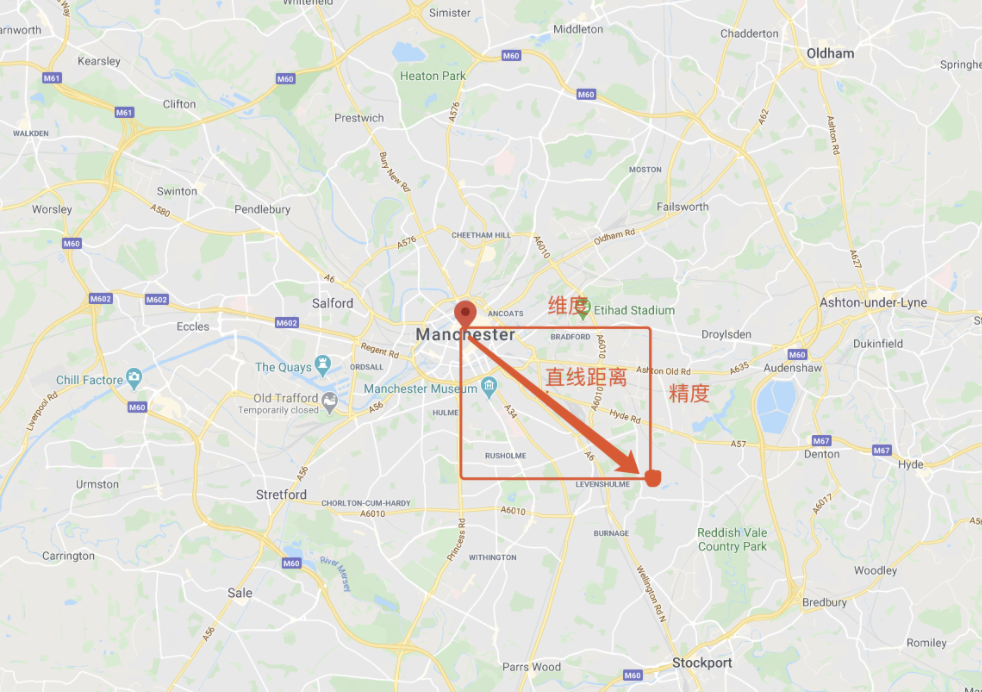

经度维度是坐标系中的横纵坐标，通过观察曼彻斯特地区的地形结构可以看到，曼彻斯特呈现环形因此考虑把经纬度折算成欧式距离——即对角线

In [110]:
# 曼彻斯特中心坐标53.476672, -2.246384

In [111]:
from geopy.distance import great_circle

In [112]:
def distance_from_center(lat, lon):
    berlin_centre = (53.476672, -2.246384)
    record = (lat, lon)
    return great_circle(berlin_centre, record).km

In [113]:
dfdata['distance'] = dfdata.apply(lambda x: distance_from_center(x.latitude, x.longitude), axis=1)

del dfdata['latitude']
del dfdata['longitude']
dfdata.head(1)

,id,room_type,price,minimum_nights,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,is_popular,distance
4847,40141902,2,30,1,0.0,0,1,1,1,19,2,1.0,1,1.0,4,21,nan,15.00,1,10.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,2.95384


通过坐标转换，经纬度变成了举例满侧斯特中心的直线距离

#### host_has_profile_pic	host_identity_verified 合并
这两列是对照片验证和身份验证的，因此考虑合并成host_verifieds=(host_has_profile_pic+host_identity_verified)/2

In [114]:
dfdata['host_verifieds'] = (dfdata['host_has_profile_pic'] +dfdata['host_identity_verified'])/2

In [116]:
del dfdata['host_has_profile_pic']
del dfdata['host_identity_verified']

In [119]:
dfdata.sample(5)

,id,room_type,price,minimum_nights,host_response_rate,host_is_superhost,host_listings_count,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,is_popular,distance,host_verifieds
2531,29073937,2,34,1,1.00,0,3,19,2,1.0,1,1.0,4,14,0.00,5.00,1,12.00,100.0,10.0,9.0,10.0,10.0,10.0,10.0,0,0,1,0,10.647189,1.0
2493,28853845,2,37,1,0.50,1,1,19,2,1.0,1,1.0,4,18,0.00,0.00,1,5.00,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,1,2.807719,0.5
172,4791845,0,78,2,1.00,1,7,1,6,1.5,2,2.0,4,47,nan,30.00,2,19.00,96.0,10.0,9.0,10.0,10.0,10.0,9.0,0,0,3,1,1.368151,1.0
4667,39609455,0,110,2,0.96,0,41,1,4,1.0,1,1.0,4,17,100.00,35.00,2,20.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,28,0,3.019030,0.5
2449,28594020,0,26,1,1.00,1,3,1,2,1.0,1,1.0,4,18,100.00,15.00,1,0.00,100.0,10.0,9.0,10.0,10.0,10.0,10.0,0,0,2,0,4.513058,0.5


#### review_scores_accuracy	review_scores_cleanliness	review_scores_checkin	review_scores_communication	review_scores_location	review_scores_value 合并

考虑以下几列都是评分，满分均为10分，因此考虑取均值计算review_scores_mean
- review_scores_accuracy	
- review_scores_cleanliness	
- review_scores_checkin	
- review_scores_communication	
- review_scores_location	
- review_scores_value

In [120]:
dfdata['review_scores_mean'] = (dfdata['review_scores_accuracy'] +dfdata['review_scores_cleanliness']+dfdata['review_scores_checkin']+dfdata['review_scores_communication']+dfdata['review_scores_location']+dfdata['review_scores_value'])/6
dfdata=dfdata.drop(['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value'],axis=1)
dfdata.sample(5)

,id,room_type,price,minimum_nights,host_response_rate,host_is_superhost,host_listings_count,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,review_scores_rating,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,is_popular,distance,host_verifieds,review_scores_mean
107,3138325,0,40,3,1.00,1,1,1,4,1.0,2,2.0,4,47,200.00,25.00,2,15.00,94.0,0,0,1,1,1.790514,0.5,9.833333
122,3683463,0,65,2,1.00,0,2,19,5,1.0,3,5.0,4,15,0.00,10.00,2,5.00,100.0,0,0,1,0,6.372846,0.5,10.000000
645,13679742,2,40,1,0.00,0,1,27,2,1.0,1,1.0,4,15,70.00,20.00,1,0.00,0.0,0,0,0,0,0.953620,0.5,0.000000
1608,22074684,2,24,1,0.75,1,1,19,2,1.5,1,1.0,4,29,nan,nan,1,5.00,99.0,0,0,0,1,10.753006,0.5,10.000000
3906,36944107,2,28,1,1.00,1,3,12,2,1.5,1,1.0,4,23,0.00,0.00,1,5.00,99.0,0,0,1,1,9.385778,0.5,10.000000


这列review_scores_mean最大值是10，因此把数据变成0-1之间，也就是除以最大值

In [124]:
dfdata['review_scores_mean']=dfdata['review_scores_mean']/10

In [125]:
dfdata.sample(5)

,id,room_type,price,minimum_nights,host_response_rate,host_is_superhost,host_listings_count,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,review_scores_rating,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,is_popular,distance,host_verifieds,review_scores_mean
3196,33265507,0,65,2,1.0,0,3,1,4,2.0,2,3.0,4,18,85.00,67.00,2,15.00,92.0,0,0,3,0,0.724773,0.5,0.950000
2793,30756740,0,48,3,1.0,1,1,1,2,1.0,1,1.0,4,33,0.00,50.00,1,0.00,97.0,0,0,1,1,1.115072,1.0,0.983333
829,15461555,2,25,2,1.0,0,1,27,2,1.5,1,0.0,4,23,nan,nan,1,5.00,97.0,0,0,0,1,9.317834,0.5,0.983333
679,14011355,0,80,3,1.0,0,1,19,4,1.0,2,2.0,4,27,100.00,35.00,1,0.00,92.0,0,0,1,1,5.307419,1.0,0.950000
3201,33293355,2,24,2,1.0,0,5,1,2,1.0,1,1.0,4,24,0.00,5.00,1,5.00,92.0,0,0,0,0,1.821671,0.5,0.966667


#### review_scores_rating转为0-1之间数据

In [129]:
dfdata['review_scores_rating']=dfdata['review_scores_rating']/dfdata['review_scores_rating'].max()

In [130]:
dfdata.sample(5)

,id,room_type,price,minimum_nights,host_response_rate,host_is_superhost,host_listings_count,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,review_scores_rating,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,is_popular,distance,host_verifieds,review_scores_mean
3628,35515693,0,150,1,0.00,0,1,19,8,2.0,5,5.0,4,21,nan,nan,1,0.00,0.00,0,0,1,0,12.927601,0.5,0.000000
803,15270804,2,35,1,0.00,0,1,1,2,1.0,1,1.0,4,16,100.00,0.00,1,0.00,0.95,0,0,0,0,1.545658,0.5,0.966667
468,11204792,0,165,2,0.95,0,4,28,16,2.5,4,10.0,4,38,100.00,50.00,4,45.00,0.92,0,0,11,1,1.886518,1.0,0.916667
4197,38328129,2,25,1,1.00,0,7,1,2,1.5,1,2.0,4,40,0.00,0.00,1,0.00,0.93,0,0,1,0,10.133796,0.5,0.916667
3004,32229075,0,85,2,1.00,0,2,1,2,1.0,1,2.0,4,30,200.00,52.00,1,0.00,0.83,0,0,2,0,2.603340,0.5,0.850000


## 做热力图，再次剔除低相关性数据

(23.5, -0.5)

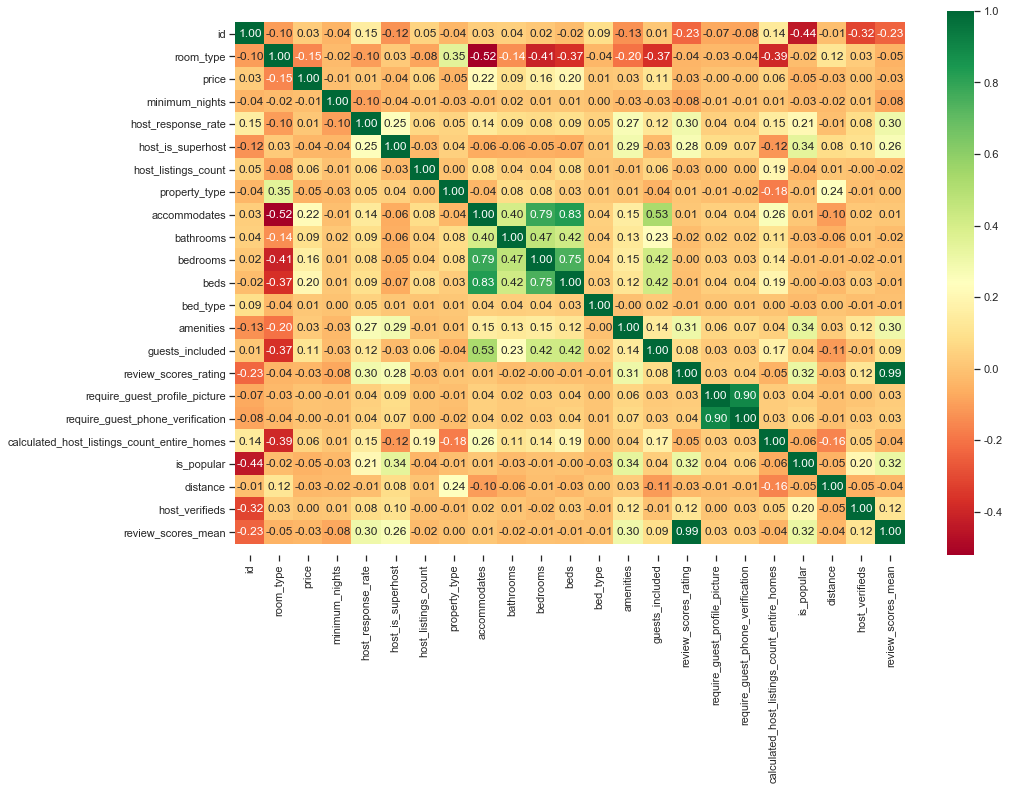

In [131]:
plt.figure(figsize=(15,10))
ax= sns.heatmap(dfdata.corr(),cmap=plt.cm.RdYlGn , annot=True ,fmt='.2f')
a,b =ax.get_ylim()
ax.set_ylim(a+0.5,b-0.5)

观察数据：
- minimum_night,host_response_rate,bedtype, host_response_rate, require_guest_profile_picture, phone 这几列与price相关度非常低
- minimum_night,beds,bed_type 相关度很低，

因此删交集--minimum——nights


In [132]:
del dfdata['minimum_nights']
dfdata.head(5)

,id,room_type,price,host_response_rate,host_is_superhost,host_listings_count,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,review_scores_rating,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,is_popular,distance,host_verifieds,review_scores_mean
4847,40141902,2,30,0.00,0,1,19,2,1.0,1,1.0,4,21,nan,15.00,1,10.00,0.0,0,0,0,0,2.953840,1.0,0.0
4846,40137725,2,100,0.78,0,8,19,2,2.0,1,1.0,4,19,nan,nan,1,0.00,0.0,0,0,3,0,7.440161,0.5,0.0
4845,40136664,0,64,0.82,0,8,1,5,1.5,2,2.0,4,23,0.00,25.00,1,0.00,0.0,0,0,7,0,3.545530,1.0,0.0
4844,40136630,2,60,0.78,0,8,19,2,2.0,1,3.0,4,27,200.00,15.00,2,25.00,0.0,0,0,3,0,7.440161,0.5,0.0
4843,40136464,2,60,0.78,0,8,19,2,2.0,1,2.0,4,20,200.00,20.00,2,25.00,0.0,0,0,3,0,7.440161,0.5,0.0


In [133]:
dfdata.shape

(4848, 25)

In [134]:
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4848 entries, 4847 to 0
Data columns (total 25 columns):
id                                             4848 non-null int64
room_type                                      4848 non-null int64
price                                          4848 non-null int64
host_response_rate                             4848 non-null float64
host_is_superhost                              4848 non-null int64
host_listings_count                            4848 non-null int64
property_type                                  4848 non-null int64
accommodates                                   4848 non-null int64
bathrooms                                      4848 non-null float64
bedrooms                                       4848 non-null int64
beds                                           4848 non-null float64
bed_type                                       4848 non-null int64
amenities                                      4848 non-null int64
security_deposit

### 到此，部分特征数值化，清洗数据基本结束，

In [135]:
print(len(dfdata))
dfdata=dfdata.drop_duplicates(subset=['id'])
len(dfdata)

4848


4848

到现在，基本数值化都结束了，把这个表格单存储一份

In [136]:
dfdata.to_csv('cleaned_airbnb.csv')

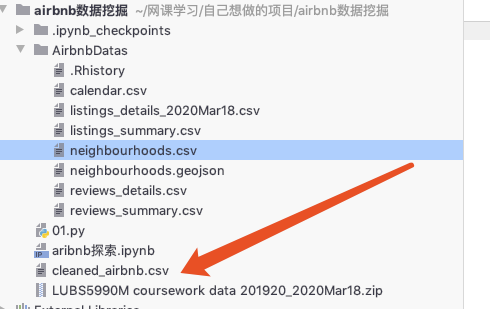

# 开始模型部分



详见另一个笔记本